In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('max_columns', 50)

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, DBSCAN



In [9]:
train = pd.read_csv('train.csv')
y = train['IN_TREINEIRO']
test = pd.read_csv('test.csv')

In [11]:
columns_use = test.columns
df_train = train[columns_use]

In [38]:
df_train.isnull().sum()

NU_INSCRICAO                 0
CO_UF_RESIDENCIA             0
SG_UF_RESIDENCIA             0
NU_IDADE                     0
TP_SEXO                      0
TP_COR_RACA                  0
TP_NACIONALIDADE             0
TP_ST_CONCLUSAO              0
TP_ANO_CONCLUIU              0
TP_ESCOLA                    0
TP_ENSINO                 9448
TP_DEPENDENCIA_ADM_ESC    9448
IN_BAIXA_VISAO               0
IN_CEGUEIRA                  0
IN_SURDEZ                    0
IN_DISLEXIA                  0
IN_DISCALCULIA               0
IN_SABATISTA                 0
IN_GESTANTE                  0
IN_IDOSO                     0
TP_PRESENCA_CN               0
TP_PRESENCA_CH               0
TP_PRESENCA_LC               0
TP_PRESENCA_MT               0
NU_NOTA_CN                3389
NU_NOTA_CH                3389
NU_NOTA_LC                3597
TP_LINGUA                    0
TP_STATUS_REDACAO         3597
NU_NOTA_COMP1             3597
NU_NOTA_COMP2             3597
NU_NOTA_COMP3             3597
NU_NOTA_

In [50]:
columns_princ = ['NU_IDADE', 'TP_ST_CONCLUSAO']

In [51]:
import matplotlib.pyplot as plt

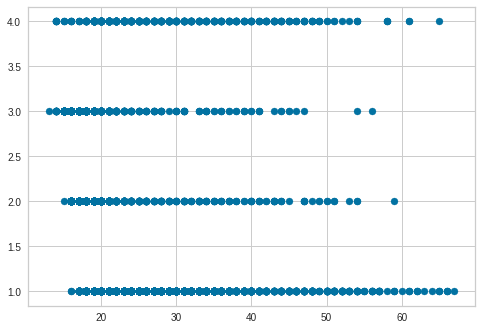

In [52]:
plt.scatter(df_train['NU_IDADE'], df_train['TP_ST_CONCLUSAO'])

In [53]:
X_train, X_test, y_train, y_test = train_test_split(df_train[columns_princ], y, test_size=.35, random_state=21)

In [58]:
kmeans = KMeans()

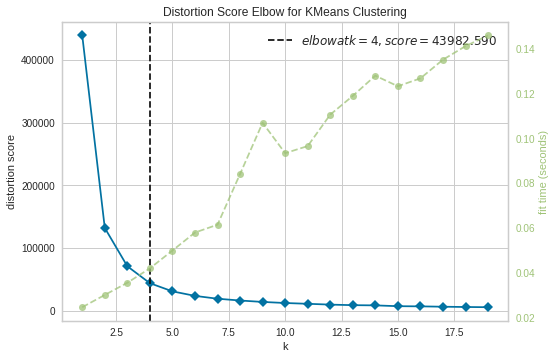

In [55]:
from yellowbrick.cluster import KElbowVisualizer # importando a biblioteca necessária15


visualizer = KElbowVisualizer(kmeans, k=(1, 20)) #como parametros temos o model (kmeans) e o "k" é range que eu quero testar indo de 1 a 20
visualizer.fit(X_train) #aqui ele está treinando
visualizer.show() #aqui ele plota o grafico

In [67]:
kmeans = KMeans(n_clusters=2, max_iter=2000, algorithm='elkan')

In [80]:
kmeans.fit(X_train, y_train)

KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=2000,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [81]:
train_valid = kmeans.predict(X_train)

In [82]:
np.mean(train_valid == y_train.values)

0.7275885253249664

In [83]:
test_valid = kmeans.predict(X_test)

In [84]:
np.mean(test_valid == y_test.values)

0.7267998335414065

In [111]:
dbsc = DBSCAN(min_samples=50)
#dbsc.fit(X_train)

In [115]:
train_valid = dbsc.fit_predict(X_train)

In [117]:
train_valid

array([ 0,  1,  2, ..., 14,  7, -1])

In [4]:
test = pd.read_csv('test.csv')

In [6]:
answer = pd.DataFrame()
answer['NU_INSCRICAO'] = test['NU_INSCRICAO']
answer['IN_TREINEIRO'] = 0

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
columns_princ = ['NU_IDADE', 'TP_ST_CONCLUSAO']

In [14]:
rfc = RandomForestClassifier(n_estimators=1000, n_jobs=10).fit(train[columns_princ], y)

In [16]:
pred = rfc.predict(test[columns_princ])

In [17]:
answer = pd.DataFrame()
answer['NU_INSCRICAO'] = test['NU_INSCRICAO']
answer['IN_TREINEIRO'] = pred

In [18]:
answer.to_csv('answer.csv', index=None)